#Image Compression using PCA

The goal of this notebook is to compress arbitrary images using Principal Component Analysis to obtain the most visually appealing compressed image. The image compression technique is used to reduce irrelevance and redundancy of the image data and to be able to store or transmit the data in an efficient form. It compresses the image data into a smaller size by using dimensionality reduction technique of PCA.


##What is Principal Component Analysis(PCA)?

PCA is defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

## Steps Involved in PCA

### 1. Standardization
The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.

                Z = Value - Mean
                   --------------
                   Standard Deviation


### 2. Covariance Matrix Computation
Sometimes, variables are highly correlated in such a way that they contain redundant information. So, in order to identify these correlations, we compute the covariance matrix.

![Principal%2520Component%2520Analysis%2520Covariance%2520Matrix.png](attachment:Principal%2520Component%2520Analysis%2520Covariance%2520Matrix.png)


### 3. Compute the Eigevalue and EigenVectors
Eigenvectors and eigenvalues are the linear algebra concepts that we need to compute from the covariance matrix in order to determine the principal components of the data. Before getting to the explanation of these concepts, let’s first understand what do we mean by principal components.


### 4. Feature Vector
computing the eigenvectors and ordering them by their eigenvalues in descending order, allow us to find the principal components in order of significance. In this step, what we do is, to choose whether to keep all these components or discard those of lesser significance (of low eigenvalues), and form with the remaining ones a matrix of vectors that we call Feature vector.




##Why PCA for Image Compression?

PCA technique allows the identification of standards in data and their expression in such a way that their similarities and differences are emphasized. Once patterns are found, they can be compressed, i.e., their dimensions can be reduced without much loss of information. Thus by using PCA we can minimize the size in bytes of images while keeping as much of the quality of the images as possible.

## Costructing PCA from Scratch

As there are as many principal components as there are variables in the data, principal components are constructed in such a manner that the first principal component accounts for the largest possible variance in the data set. For example, let’s assume that the scatter plot of our data set is as shown below, can we guess the first principal component ? Yes, it’s approximately the line that matches the purple marks because it goes through the origin and it’s the line in which the projection of the points (red dots) is the most spread out. Or mathematically speaking, it’s the line that maximizes the variance (the average of the squared distances from the projected points (red dots) to the origin).

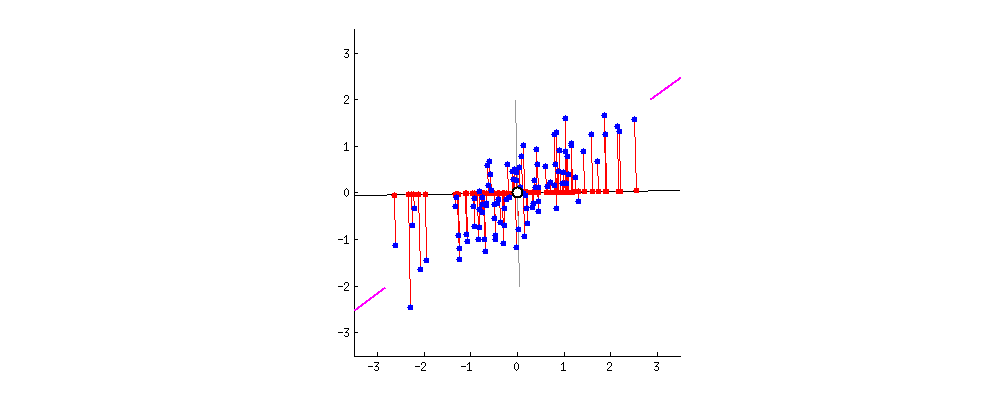

#Implementation Of the Project

###Importing all the Libraries


Libraries used for image processing:

PIL : Python Imaging Library (expansion of PIL) incorporates lightweight image processing tools that aids in editing, creating and saving images.

BytesIO : BytesIO implements read and write bytes data in memory.

Libraries used for data manipulation:


NumPy : NumPy contains a multi-dimensional array and matrix data structures and performs a number of mathematical operations on arrays such as trigonometric, statistical, and algebraic routines

Pandas : Pandas enables a variety of reading functions for a wide range of data formats, commands to best select the subset you want to analyze and provides a variety of tools for data manipulation such as merging, joining and concatenation.

Libraries used for visualization:

Matplotlib : Matplotlib consists of several plots like the Line Plot, Bar Plot, Scatter Plot, Histogram e.t.c through which we can visualise various types of data.

Seaborn : Seaborn has plotting functions that operates on dataframes as well as on arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative visualizations.

Libraries used for model building:

Sklearn : Scikit-learn (Sklearn) provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface.


*   PCA : PCA is fundamentally used to implement dimensionality reduction algorithm. 
*   MinMaxScaler :  MinMaxScaler subtracts  each value in a feature with the minimum value in the feature and then divides them by the range. The range is the difference between the original maximum and original minimum and it preserves the shape of the original distribution and doesn’t meaningfully change the information embedded in the original data.



In [2]:
# image processing
from PIL import Image
from io import BytesIO

# data analysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
from importlib import reload
from mpl_toolkits import mplot3d
import seaborn as sns

#model building
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

###Loading the image


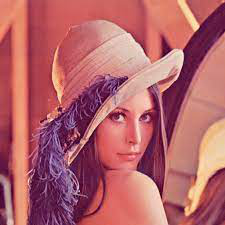

In [3]:
ori_img = Image.open("download.jpg")
ori_img

###Image Exploration
Each pixel in an image can be represented as three 8-bit unsigned (positive) integers ranging from 0 to 255, or scaled into three unsigned (positive) float ranging from 0 to 1. The three values specify the intensity values of each red, green, blue color, which often called as RGB encoding. In this notebook, we use a 225 by 225 pixels of download.jpg, which serve as a standard test image widely used in image processing field.

In [4]:
X = np.array(ori_img.getdata())
ori_pixels = X.reshape(*ori_img.size, -1)
ori_pixels.shape

(225, 225, 3)

Pixels are stored as a 3D matrix with shape (225, 225, 3). The first two values specify the width and height of the image, the last value specifies the RGB encoding. Let us identify other attributes of an image, which are image size in kilobytes (KB) and the number of unique colors.

By using BytesIO we can generate a pipeline of the image and throught that pipeline we can calculate the size of the image in kilobytes(KB).

In [5]:
def imageByteSize(img):
    img_file = BytesIO()
    image = Image.fromarray(np.uint8(img))
    image.save(img_file, 'png')
    return img_file.tell()/1024

ori_img_size = imageByteSize(ori_img)
ori_img_size

81.3017578125

The getdata() function returns the contents of this image as a sequence object containing pixel values. The sequence object is flattened, so that values for line one follow directly after the values of line zero, and so on and by applying set function to it we can get no of unique colors in the image download.jpg.

In [6]:
ori_img_n_colors = len(set(ori_img.getdata()))
ori_img_n_colors

29464

The original image size of download.png is 81 KB and has 29464 unique colors present in the image. So, we can say it is very unlikely for two pixels in download.png to have the same exact RGB values.

Our original image consists of three color channels: red, green, and blue. For each color channel, we treat the pixels as a 2D matrix with (height) observations and (width) features. In **download.png**, we have three 2D matrices with 225 observations and 225 features.

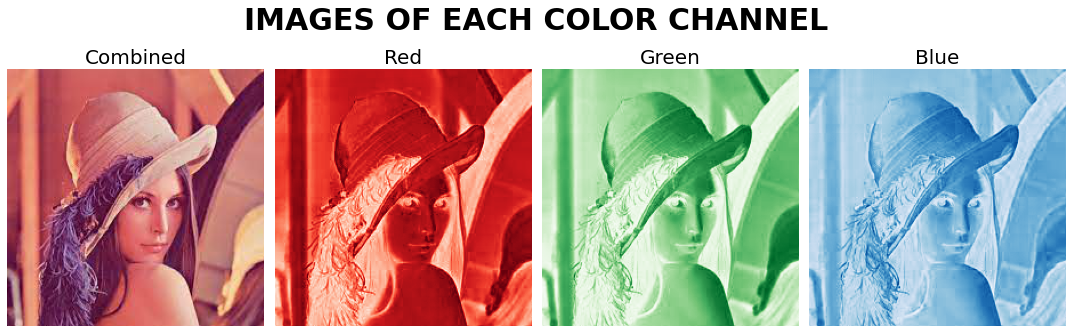

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(15,5))
cmap_list = ["Reds", "Greens", "Blues"]

axes[0].imshow(ori_pixels)
axes[0].axis("off")
axes[0].set_title("Combined", size = 20)

for idx, ax, px in zip(range(3), axes[1:], ori_pixels.T):
    ax.imshow(px.T, cmap = cmap_list[idx])
    ax.axis("off")
    ax.set_title(cmap_list[idx][:-1], size = 20)
    
plt.tight_layout()
fig.suptitle("IMAGES OF EACH COLOR CHANNEL", size = 30, y = 1.03, fontweight = "bold")
plt.show()

###Principal Component Analysis of RGB Channels
PCA is performed on each color channel, resulting in a PCA projection (or scores) and principal components (axes) which both will be in the form of a matrix with shape  225 × 225. 

In [8]:
res = []
cum_var = []
X_t = np.transpose(X)
for channel in range(3):
    # SEPARATE EACH RGB CHANNEL
    pixel = X_t[channel].reshape(*ori_pixels.shape[:2])
    
    # PCA
    pca = PCA(random_state = 123)
    pixel_pca = pca.fit_transform(pixel)
    
    pca_dict = {
        "Projection": pixel_pca,
        "Components": pca.components_,
        "Mean": pca.mean_
    }
    res.append(pca_dict)
    
    # EVALUATION
    cum_var.append(np.cumsum(pca.explained_variance_ratio_))

We can visualize the principal components for each color channel as follows:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


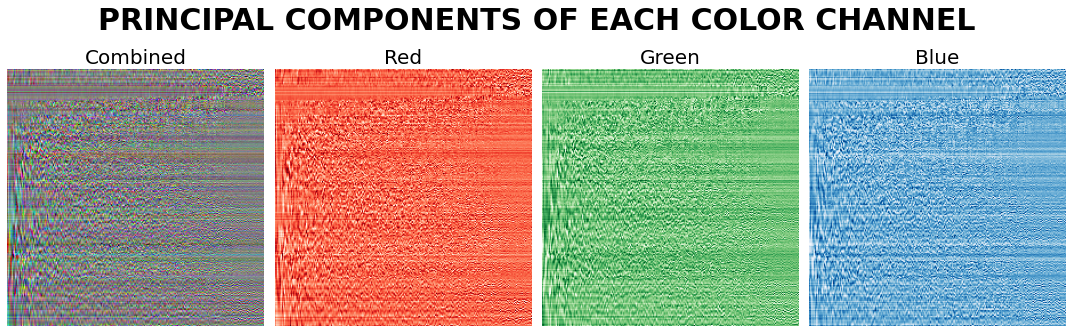

In [9]:
scaler = MinMaxScaler()
scaled_pixels = [scaler.fit_transform(res[i]["Components"])*255 for i in range(3)]

fig, axes = plt.subplots(1, 4, figsize=(15,5))
cmap_list = ["Reds", "Greens", "Blues"]

axes[0].imshow(np.array(scaled_pixels).T/255)
axes[0].axis("off")
axes[0].set_title("Combined", size = 20)

for idx, ax, px in zip(range(3), axes[1:], scaled_pixels):
    ax.imshow((px/255).T, cmap = cmap_list[idx])
    ax.axis("off")
    ax.set_title(cmap_list[idx][:-1], size = 20)
plt.tight_layout()

fig.suptitle("PRINCIPAL COMPONENTS OF EACH COLOR CHANNEL", size = 30, y = 1.03, fontweight = "bold")
plt.show()

As we can see above the visualization of principal componetents of RGB channels are not informative enough, it's quite random thus should introduce a matrix called the percentage of explained variance to evaluate the principal component's performance. The value ranges from 0 to 100 percent, indicating the similarity between the original image with the compressed image.

In [10]:
cum_var_df = pd.DataFrame(np.array(cum_var).T * 100, 
                          index = range(1, pca.n_components_+1),
                          columns = ["Explained Variance by Red",
                                     "Explained Variance by Green",
                                     "Explained Variance by Blue"])
cum_var_df["Explained Variance"] = cum_var_df.mean(axis = 1)
cum_var_df

Explained Variance by Red  Explained Variance by Green  \
1                    29.422253                    25.043003   
2                    44.648800                    42.044484   
3                    54.777670                    52.599036   
4                    61.743127                    60.438008   
5                    68.410839                    65.733783   
..                         ...                          ...   
221                 100.000000                   100.000000   
222                 100.000000                   100.000000   
223                 100.000000                   100.000000   
224                 100.000000                   100.000000   
225                 100.000000                   100.000000   

     Explained Variance by Blue  Explained Variance  
1                     18.359228           24.274828  
2                     35.481535           40.724940  
3                     45.088291           50.821666  
4                     51.892086           58.024407  
5                     57.285349           63.809990  
..                          ...                 ...  
221                  100.000000          100.000000  
222                  100.000000          100.000000  
223                  100.000000          100.000000  
224                  100.000000          100.000000  
225                  100.000000          100.000000  

[225 rows x 4 columns]

### Iterate
In this section, we will be performing these steps for $n_{select}=1$ until $n_{select}=220$:
1. Subset the first $n_{select}$ columns of PCA projection and the first $n_{select}$ rows of the components
2. Reconstruct the original image by the formula:
<center>$ PCA Reconstruction = Projection . Eigenvectors^T + Mean $</center>
3. Repeat step 1-2 for each color channel Red, Green, and Blue
4. Combine the PCA Reconstruction of the three color channel into one 3D matrix
5. Save metrics value for further optimization: Explained Variance, Image Size, and No. of Colors
6. Plot the compressed (reconstructed) image with an increasing number of principal components

In [11]:
pca_results = []
for n in range(1, pca.n_components_+1):
    # SELECT N-COMPONENTS FROM PC
    temp_res = []
    for channel in range(3):
        pca_channel = res[channel]
        pca_pixel = pca_channel["Projection"][:, :n]
        pca_comp = pca_channel["Components"][:n, :]
        pca_mean = pca_channel["Mean"]
        compressed_pixel = np.dot(pca_pixel, pca_comp) + pca_mean
        temp_res.append(compressed_pixel.T)
    compressed_image = np.transpose(temp_res)
    
    pca_dict = {
        "n": n,
        "Pixels": compressed_image,
        "Explained Variance": cum_var_df["Explained Variance"][n],
        "Image Size (KB)": imageByteSize(compressed_image),
        "No. of Colors": len(np.unique(np.uint8(compressed_image).reshape(-1, 3), axis = 0))
    }
    
    pca_results.append(pca_dict)

pca_results = pd.DataFrame(pca_results).set_index("n")
pca_results.head()

Pixels  Explained Variance  \
n                                                                          
1  [[[199.7952053018382, 74.8966465893736, 79.801...           24.274828   
2  [[[206.12286083414227, 75.61514922842682, 78.3...           40.724940   
3  [[[203.49447050436976, 85.10683010506524, 85.8...           50.821666   
4  [[[203.18086138641485, 81.75863388057732, 84.2...           58.024407   
5  [[[212.57656807955127, 90.2754599206462, 84.30...           63.809990   

   Image Size (KB)  No. of Colors  
n                                  
1        38.601562          34516  
2        46.558594          42129  
3        50.810547          43528  
4        54.198242          44299  
5        57.275391          44955

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

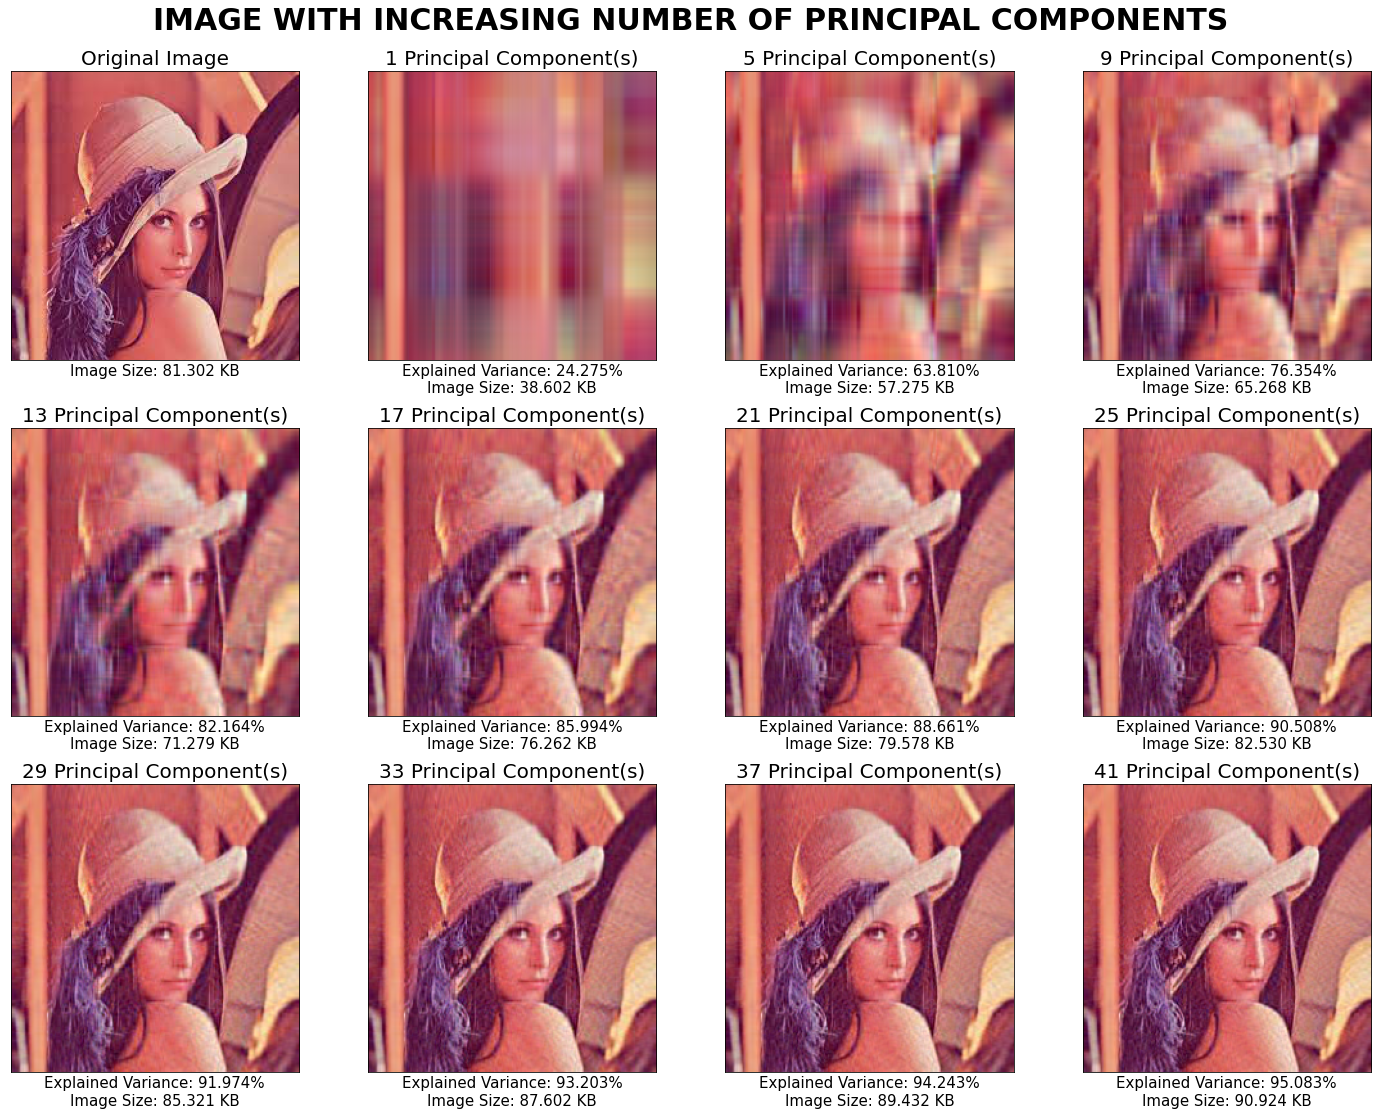

In [12]:
n_pca_images = (3, 4)
end_pc = pca_results[pca_results["Explained Variance"] >= 95].index[0]

fig, axes = plt.subplots(*n_pca_images, figsize=(20,15))
plot_n = np.linspace(1, end_pc, n_pca_images[0]*n_pca_images[1]-1, endpoint = True, dtype = int) 

# PLOTTING ORIGINAL IMAGE
axes[0][0].imshow(X.reshape(*ori_img.size, 3))
axes[0][0].set_title("Original Image", fontsize = 20)
axes[0][0].set_xlabel("Image Size: {:.3f} KB".format(ori_img_size), fontsize = 15)
axes[0][0].set_xticks([])
axes[0][0].set_yticks([])
        
for ax, n in zip(axes.flat[1:], plot_n):
    # PLOTTING COMPRESSED IMAGE
    ax.imshow(pca_results.loc[n, "Pixels"]/255)
    ax.set_title("{} Principal Component(s)".format(n), fontsize = 20)
    ax.set_xlabel("Explained Variance: {:.3f}%\nImage Size: {:.3f} KB".format(pca_results.loc[n, "Explained Variance"],
                                                                            pca_results.loc[n, "Image Size (KB)"]),
                  fontsize = 15)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
fig.suptitle("IMAGE WITH INCREASING NUMBER OF PRINCIPAL COMPONENTS", size = 30, y = 1.03, fontweight = "bold")
plt.show()

## PCA Metrics: Optimal Number of Principal Components
In this section, we will try to search for an optimal number of PCs in order to reduce the memory size to be as small as possible while achieving the expected explained variance percentage.

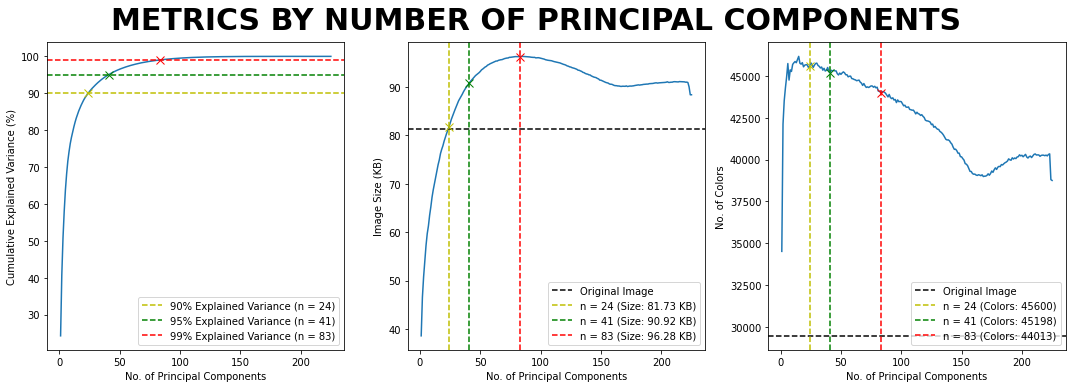

In [13]:
line_colors = "ygr"
fig, axes = plt.subplots(1, 3, figsize=(15,5))
for ax, metric in zip(axes, pca_results.columns[1:]):
    sns.lineplot(x = pca_results.index, y = metric, data = pca_results, ax = ax)
    ax.set_xlabel("No. of Principal Components")
    
    if metric == "Explained Variance":
        lookup_n_var = []
        for idx, exp_var in enumerate([90, 95, 99]):
            lookup_n = pca_results[pca_results[metric] >= exp_var].index[0]
            lookup_n_var.append(lookup_n)
            ax.axhline(y = exp_var, color = line_colors[idx], linestyle = '--',
                       label = "{}% Explained Variance (n = {})".format(exp_var, lookup_n))
            ax.plot(lookup_n, exp_var, color = line_colors[idx], marker = 'x', markersize = 8)
            ax.set_ylabel("Cumulative Explained Variance (%)")
        ax.legend()
        continue
    elif metric == "Image Size (KB)":
        y_val = ori_img_size
        line_label = "n = {} (Size: {:.2f} KB)"
    elif metric == "No. of Colors":
        y_val = ori_img_n_colors
        line_label = "n = {} (Colors: {})"
        
    ax.axhline(y = y_val, color = 'k', linestyle = '--', label = "Original Image")
    for idx, n_components in enumerate(lookup_n_var):
        lookup_value = pca_results.loc[n_components, metric]
        ax.axvline(x = n_components, color = line_colors[idx], linestyle = '--',
                   label = line_label.format(n_components, lookup_value))
        ax.plot(n_components, lookup_value, color = line_colors[idx], marker = 'x', markersize = 8)
    ax.legend()
plt.tight_layout()
fig.suptitle("METRICS BY NUMBER OF PRINCIPAL COMPONENTS", size = 30, y = 1.07, fontweight = "bold")
plt.show()

We want to get the optimal number of principal components by first analyzing the explained variance, here is the thought process:

Left plot: We need 24, 41, and 83 principal components to be able 90%, 95%, and 99% respectively explain the variance of our original image.

Mid plot: But there's a trade-off, the more variance we want to explain, the bigger is the image size. The black dashed line indicates the original image size, we want to choose  n  below this line. So, it's either 24 or 41 principal components.

Right plot: The number of colors present in the image will be less if we increase  n  from 24 to 41 and then to 83.


In [14]:
target_exp_var = 95
n_opt = pca_results[pca_results["Explained Variance"] >= target_exp_var].index[0]
n_opt

41

From the plots and maximum explained variance, we can conclude to choose 41 principal components because it gives us smaller image size with reasonably high explained variance, and the number of colors is closer to the original image than using 24 principal components.

### Compare to Original Image

Finally, let's compare the compressed image using  n=33  with the original image side by side.

In [17]:
ori = {
    "Type": "Original",
    "Pixels": X,
    "No. of Colors": ori_img_n_colors,
    "Image Size (KB)": ori_img_size,
    "Explained Variance": 100
}
pc_reduced = {
    "Type": "PC-Reduced",
    "Pixels": pca_results.loc[n_opt, "Pixels"],
    "No. of Colors": pca_results.loc[n_opt, "No. of Colors"],
    "Image Size (KB)": pca_results.loc[n_opt, "Image Size (KB)"],
    "Explained Variance": pca_results.loc[n_opt, "Explained Variance"]
}
ori_vs_pca = pd.DataFrame([ori, pc_reduced]).set_index("Type")
ori_vs_pca

Pixels  No. of Colors  \
Type                                                                           
Original    [[231, 133, 120], [231, 133, 120], [230, 132, ...          29464   
PC-Reduced  [[[220.051551344851, 120.92742600881348, 101.6...          45198   

            Image Size (KB)  Explained Variance  
Type                                             
Original          81.301758          100.000000  
PC-Reduced        90.923828           95.082506

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


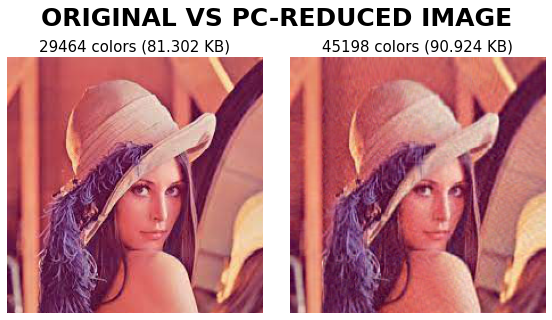

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
for ax, (typ, row) in zip(axes.flat, ori_vs_pca.iterrows()):
    img_array = np.array(row["Pixels"]/255)
    ax.imshow(img_array.reshape(*ori_img.size, 3))
    ax.axis("off")
    ax.set_title("{} colors ({:.3f} KB)".format(row["No. of Colors"], row["Image Size (KB)"]), fontsize=15)
plt.tight_layout()
fig.suptitle("ORIGINAL VS PC-REDUCED IMAGE", size = 25, y = 1.1, fontweight = "bold")
plt.show()

By using PCA, we acheived the compressed image success to capture 95.072% variance of the original image. 